In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

In [3]:
df = pd.read_csv('/workspaces/SentinelNet/data/Friday-WorkingHours-Morning.pcap_ISCX.csv')
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,3268,112740690,32,16,6448,1152,403,0,201.5,204.724205,...,32,3.594286e+02,1.199802e+01,380,343,16100000.0,4.988048e+05,16400000,15400000,BENIGN
1,389,112740560,32,16,6448,5056,403,0,201.5,204.724205,...,32,3.202857e+02,1.574499e+01,330,285,16100000.0,4.987937e+05,16400000,15400000,BENIGN
2,0,113757377,545,0,0,0,0,0,0.0,0.000000,...,0,9.361829e+06,7.324646e+06,18900000,19,12200000.0,6.935824e+06,20800000,5504997,BENIGN
3,5355,100126,22,0,616,0,28,28,28.0,0.000000,...,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
4,0,54760,4,0,0,0,0,0,0.0,0.000000,...,0,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN


In [4]:
df.tail()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
191028,53,61452,4,2,180,354,45,45,45.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
191029,53,171,2,2,80,272,40,40,40.0,0.0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
191030,53,222,2,2,90,354,45,45,45.0,0.0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
191031,123,16842,1,1,48,48,48,48,48.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
191032,53,153,2,2,68,100,34,34,34.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [5]:
df.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [17]:
df.columns = df.columns.str.strip()

In [18]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 184117 entries, 0 to 191032
Data columns (total 80 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Destination Port             184117 non-null  int64  
 1   Flow Duration                184117 non-null  int64  
 2   Total Fwd Packets            184117 non-null  int64  
 3   Total Backward Packets       184117 non-null  int64  
 4   Total Length of Fwd Packets  184117 non-null  int64  
 5   Total Length of Bwd Packets  184117 non-null  int64  
 6   Fwd Packet Length Max        184117 non-null  int64  
 7   Fwd Packet Length Min        184117 non-null  int64  
 8   Fwd Packet Length Mean       184117 non-null  float64
 9   Fwd Packet Length Std        184117 non-null  float64
 10  Bwd Packet Length Max        184117 non-null  int64  
 11  Bwd Packet Length Min        184117 non-null  int64  
 12  Bwd Packet Length Mean       184117 non-null  fl

In [19]:
print("\nStatistical Summary:")
print(df.describe())


Statistical Summary:


/home/codespace/.local/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/home/codespace/.local/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


       Destination Port  Flow Duration  Total Fwd Packets  \
count     184117.000000   1.841170e+05      184117.000000   
mean        6994.931060   1.207470e+07          14.254452   
std        16951.630509   3.118313e+07        1118.180759   
min            0.000000  -1.200000e+01           1.000000   
25%           53.000000   2.070000e+02           2.000000   
50%           80.000000   3.279100e+04           2.000000   
75%          443.000000   5.952290e+05           4.000000   
max        64948.000000   1.200000e+08      207964.000000   

       Total Backward Packets  Total Length of Fwd Packets  \
count           184117.000000                 1.841170e+05   
mean                16.994091                 6.192418e+02   
std               1507.326005                 8.070843e+03   
min                  0.000000                 0.000000e+00   
25%                  1.000000                 4.200000e+01   
50%                  2.000000                 7.000000e+01   
75%             

In [20]:
# Remove Duplicates
df.drop_duplicates(inplace=True)
# Remove missing values
df = df.dropna()            
# Handle Missing Values
print("\nCheck for missing values:")
print(df.isnull().sum())


Check for missing values:
Destination Port               0
Flow Duration                  0
Total Fwd Packets              0
Total Backward Packets         0
Total Length of Fwd Packets    0
                              ..
Idle Std                       0
Idle Max                       0
Idle Min                       0
Label                          0
attack_binary                  0
Length: 80, dtype: int64


/tmp/ipykernel_5754/2745522215.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="attack_binary", data=df, palette="Set2")


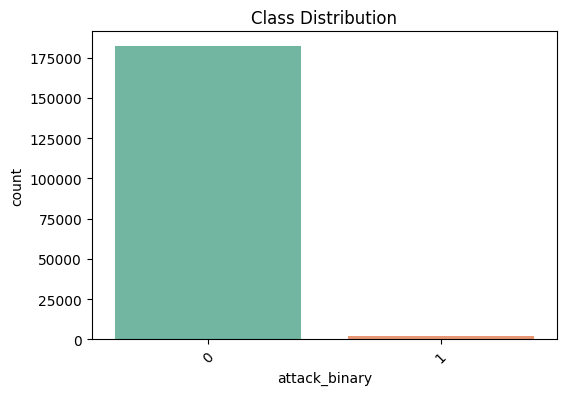

In [21]:
df.columns = df.columns.str.strip()

df['attack_binary'] = df['Label'].apply(lambda x: 0 if str(x).lower() == 'benign' else 1)

plt.figure(figsize=(6,4))
sns.countplot(x="attack_binary", data=df, palette="Set2")
plt.title("Class Distribution")
plt.xticks(rotation=45)
plt.show()

In [22]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Function to detect outliers using IQR
def detect_outliers(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[feature] < lower) | (data[feature] > upper)]

# Example: detect outliers in "Flow Duration"
outliers = detect_outliers(df, "Flow Duration")
print(f"Outliers in Flow Duration: {len(outliers)}")

Outliers in Flow Duration: 42276


In [ ]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Plot boxplots for numeric columns
plt.figure(figsize=(14, 10))
sns.boxplot(data=df[numeric_cols], orient="h")
plt.title("Horizontal Boxplots for CIC-IDS Numeric Attributes")
plt.xlabel("Value")
plt.ylabel("Features")
plt.show()

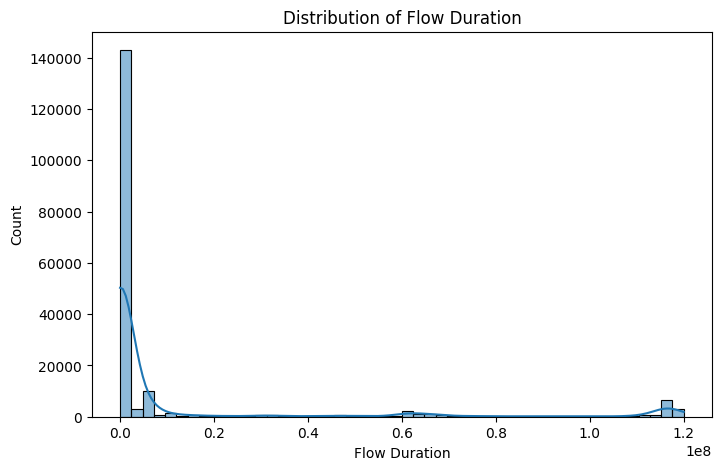

In [24]:
# Histogram to see distribution
plt.figure(figsize=(8,5))
sns.histplot(df["Flow Duration"], bins=50, kde=True)
plt.title("Distribution of Flow Duration")
plt.show()

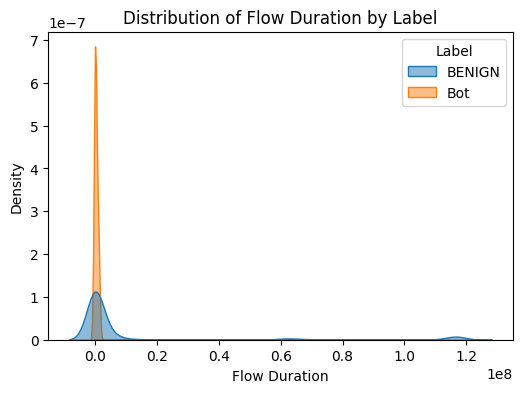

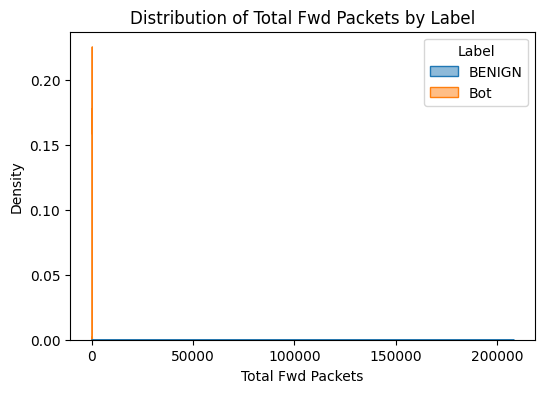

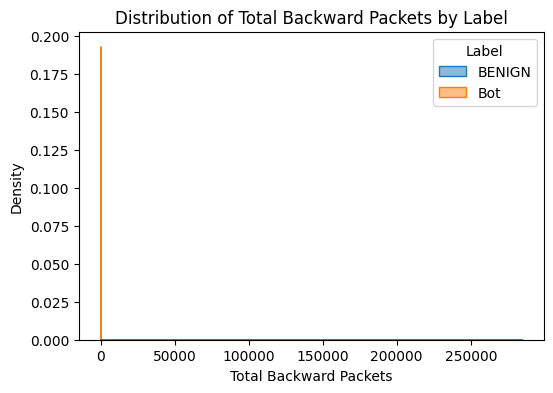

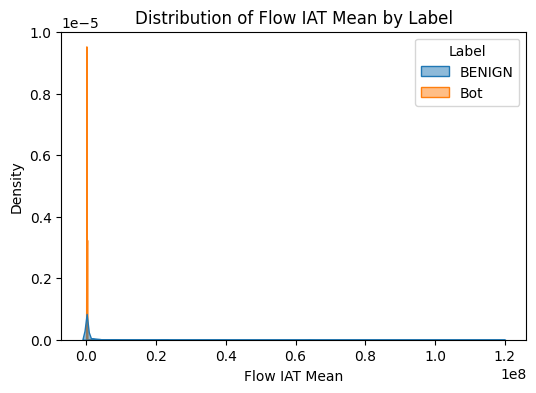

In [23]:
top_features = ["Flow Duration", "Total Fwd Packets", "Total Backward Packets", "Flow IAT Mean"]

for feature in top_features:
    plt.figure(figsize=(6,4))
    sns.kdeplot(data=df, x=feature, hue="Label", fill=True, common_norm=False, alpha=0.5)
    plt.title(f"Distribution of {feature} by Label")
    plt.show()